In [1]:
# Importing data

import pandas as pd
import numpy as np

try:
    all_sheets = pd.read_excel(
        "http://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx",
        sheet_name=None
    )
    # combine the data from both sheets into a single dataframe
    df = pd.concat(all_sheets.values(), ignore_index=True)
    
    print(f"Total raw rows: {len(df)}")
    
except Exception as e:
    print(f"Error details: {e}")

df.info()

Total raw rows: 1067371
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [2]:
# Search for columns with any missing values and drop the rows with missing values for Description and Customer ID

print(df.isnull().sum())
df.dropna(subset=["Description","Customer ID"], inplace=True)
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [3]:
# Removing duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows = {duplicate_rows}")

if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
print(df.shape)

Number of duplicate rows = 26479
(797885, 8)


In [4]:
# Remove rows where Quantity and Price are less than 0

print(df[['Quantity','Price']].describe())
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]
print(df.shape)

# Removing outliers for Quantities

Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

Outlier_threshold = 1.5 * IQR + Q3
num_outliers = df[df['Quantity'] > Outlier_threshold].shape[0]
print(f'Number of outliers {num_outliers}')

df = df[df['Quantity'] <= Outlier_threshold]
print(f'Shape after removing outliers {df.shape}')

            Quantity          Price
count  797885.000000  797885.000000
mean       12.602980       3.702732
std       191.670371      71.392549
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000
(779425, 8)
Number of outliers 51119
Shape after removing outliers (728306, 8)


In [5]:
df['Total_Price'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6


In [6]:
# Grouping data to get quantity of each item sold on each day

df['Date'] = df['InvoiceDate'].dt.date # Only keeping the date not time
daily_sales = df.groupby(['Description', 'Date'])['Quantity'].sum().reset_index()

print("\nAggregated daily sales data:")
daily_sales.head()


Aggregated daily sales data:


,Description,Date,Quantity
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,12
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,3
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,15
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1


In [7]:
product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(product_sales.head(10))

Description
WHITE HANGING HEART T-LIGHT HOLDER    27542
ASSORTED COLOUR BIRD ORNAMENT         26297
60 TEATIME FAIRY CAKE CASES           23087
PACK OF 60 PINK PAISLEY CAKE CASES    20499
JUMBO BAG RED RETROSPOT               19238
PACK OF 72 RETROSPOT CAKE CASES       18453
PACK OF 72 RETRO SPOT CAKE CASES      16913
STRAWBERRY CERAMIC TRINKET BOX        16466
REGENCY CAKESTAND 3 TIER              14481
VINTAGE SNAP CARDS                    14160
Name: Quantity, dtype: int64


Processing Product: 'WHITE HANGING HEART T-LIGHT HOLDER'
Performing feature engineering...
Splitting data into training and testing sets...
Training XGBoost model...
Evaluating model and creating visualization...


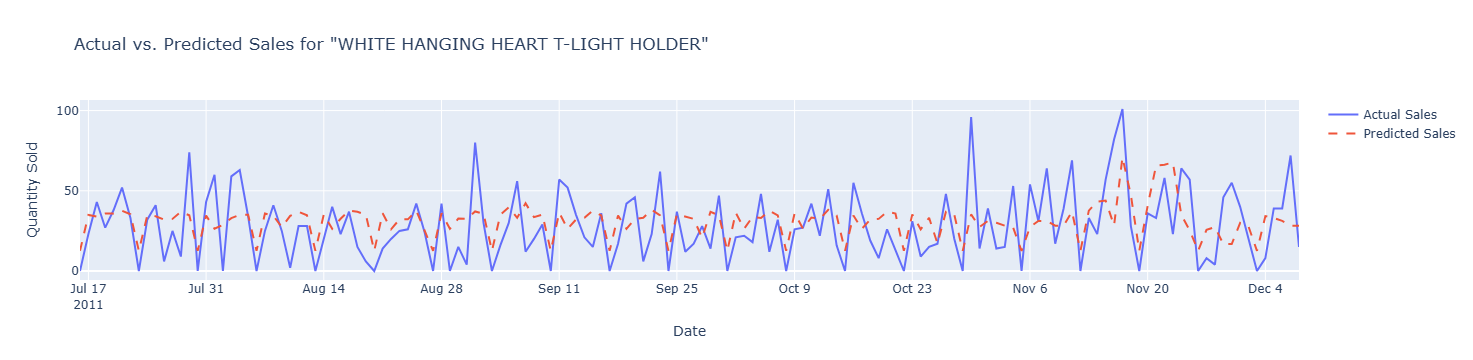

Processing Product: 'ASSORTED COLOUR BIRD ORNAMENT'
Performing feature engineering...
Splitting data into training and testing sets...
Training XGBoost model...
Evaluating model and creating visualization...


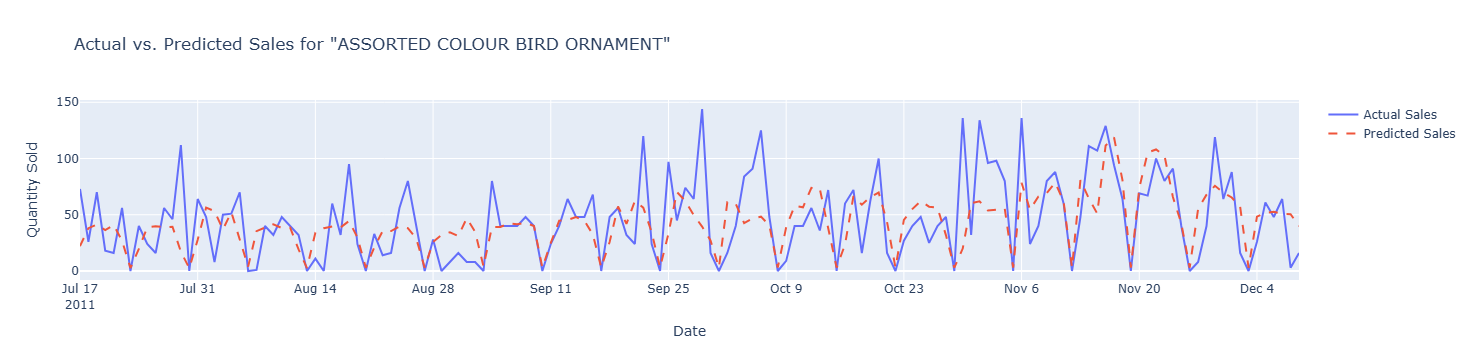

Processing Product: '60 TEATIME FAIRY CAKE CASES'
Performing feature engineering...
Splitting data into training and testing sets...
Training XGBoost model...
Evaluating model and creating visualization...


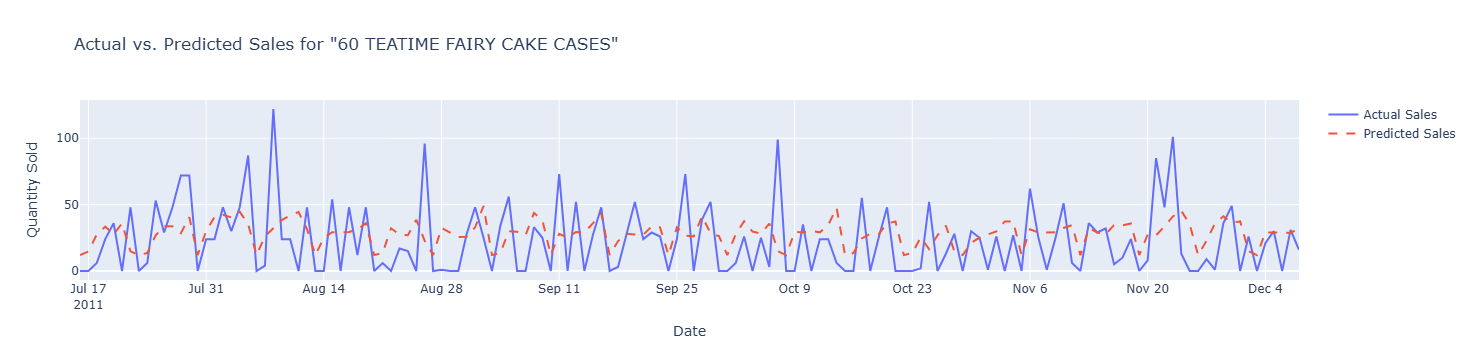

Processing Product: 'PACK OF 60 PINK PAISLEY CAKE CASES'
Performing feature engineering...
Splitting data into training and testing sets...
Training XGBoost model...
Evaluating model and creating visualization...


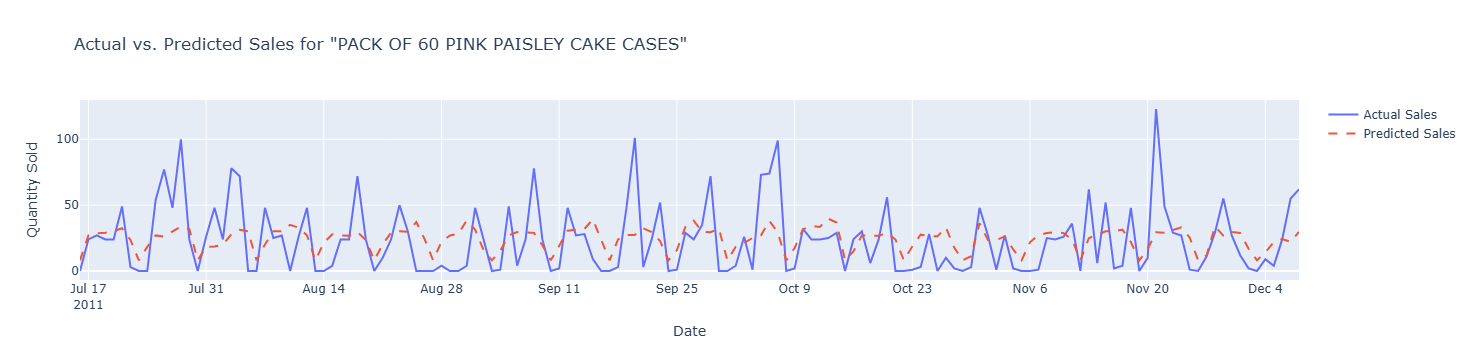

Processing Product: 'JUMBO BAG RED RETROSPOT'
Performing feature engineering...
Splitting data into training and testing sets...
Training XGBoost model...
Evaluating model and creating visualization...


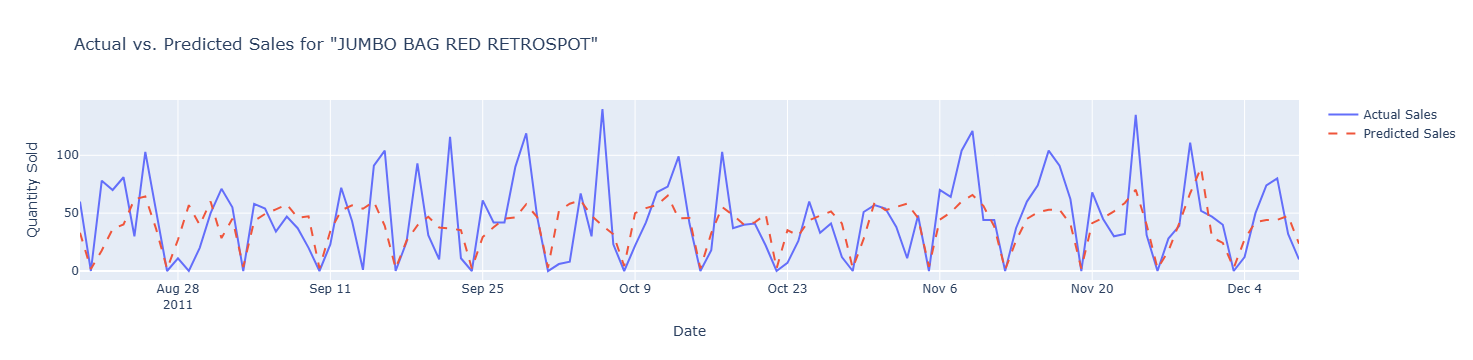

Successfully trained models for 5 products.


In [10]:
import xgboost as xgb
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
import holidays
import os
import joblib

# Dictionaries to store result
all_models = {}
all_evaluation_results = {}

# Loop for Top 5 Products
top_5_products = product_sales.head(5).index.tolist()
for product_name in top_5_products:
    print(f"Processing Product: '{product_name}'")

    # Time Series Data
    product_df = daily_sales[daily_sales['Description'] == product_name].copy()
    product_df['Date'] = pd.to_datetime(product_df['Date'])
    product_df.set_index('Date', inplace=True)
    sales_ts = product_df['Quantity'].resample('D').sum().fillna(0)
    
    # Feature Engineering
    print("Performing feature engineering...")
    df_featured = pd.DataFrame(sales_ts)
    df_featured.reset_index(inplace=True)
    df_featured.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)

    df_featured['day_of_week'] = df_featured['Date'].dt.dayofweek
    df_featured['day_of_month'] = df_featured['Date'].dt.day
    df_featured['month'] = df_featured['Date'].dt.month
    df_featured['year'] = df_featured['Date'].dt.year
    df_featured['week_of_year'] = df_featured['Date'].dt.isocalendar().week.astype(int)
    df_featured['lag_7'] = df_featured['TotalQuantity'].shift(7)
    df_featured['rolling_mean_7'] = df_featured['TotalQuantity'].rolling(window=7).mean().shift(1)
    uk_holidays = holidays.UnitedKingdom()
    df_featured['is_holiday'] = df_featured['Date'].apply(lambda x: x in uk_holidays).astype(int)
    df_featured.dropna(inplace=True)

    if df_featured.empty:
        print(f"Not enough data for '{product_name}' to create features. Skipping.")
        continue

    # Train/Test Split
    print("Splitting data into training and testing sets...")
    test_size = int(len(df_featured) * 0.2)
    train_df = df_featured[:-test_size]
    test_df = df_featured[-test_size:]
    features = ['day_of_week', 'day_of_month', 'month', 'year', 'week_of_year', 'lag_7', 'rolling_mean_7', 'is_holiday']
    target = 'TotalQuantity'
    X_train, y_train = train_df[features], train_df[target]
    X_test, y_test = test_df[features], test_df[target]
    
    if X_test.empty:
        print(f"Not enough data for '{product_name}' to create a test set. Skipping.")
        continue

    # Train the XGBoost Model
    print(f"Training XGBoost model...")
    reg = xgb.XGBRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        objective='reg:squarederror',
        early_stopping_rounds=50,
        n_jobs=-1
    )
    reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)
    all_models[product_name] = reg

    # Evaluate and Visualize Results
    print("Evaluating model and creating visualization...")
    test_df_copy = test_df.copy()
    test_df_copy['Prediction'] = reg.predict(X_test)
    all_evaluation_results[product_name] = test_df_copy

    # Visualize results for the current product
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=test_df_copy['Date'], y=test_df_copy['TotalQuantity'], mode='lines', name='Actual Sales'))
    fig.add_trace(go.Scatter(x=test_df_copy['Date'], y=test_df_copy['Prediction'], mode='lines', name='Predicted Sales', line=dict(dash='dash')))
    fig.update_layout(title=f'Actual vs. Predicted Sales for "{product_name}"', xaxis_title='Date', yaxis_title='Quantity Sold')
    fig.show()

print(f"Successfully trained models for {len(all_models)} products.")